# Weather forcasting using Logistic Regression 
This is a project based learning subject project implement using machine learning algorithm.
![](https://scijinks.gov/review/forecast-reliability/forecast-reliability2.jpg)

Methodology and planning work:

- Downloading a real-world dataset from Kaggle
- Exploratory data analysis and visualization
- Splitting a dataset into training, validation & test sets
- Filling/imputing missing values in numeric columns
- Scaling numeric features to a $(0,1)$ range
- Encoding categorical columns as one-hot vectors
- Training a logistic regression model using Scikit-learn
- Evaluating a model using a validation set and test set
- Saving a model to disk and loading it back


## Problem Statement

We'll train a _logistic regression_ model using the Rain in Australia dataset to predict whether or not it will rain at a location tomorrow, using today's data. This is a _binary classification_ problem:

> **QUESTION**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
> 
> ![](https://i.imgur.com/5QNJvir.png)
>
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 
>
>
> ![](https://i.imgur.com/KWfcpcO.png)



## Importing the Libraries
importing the libraries which we will used in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import matplotlib 
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid')

# <center>Data Preparation and Cleaning</center>

Here various modes of displaying dataset which is in CSV format.
First step is to load the data using pandas read_csv function. the data is stored in mutidimensional table called as dataframe.

## Loading the Data

In [3]:
df = pd.read_csv("weatherAUS.csv")

In [4]:
rows, columns = df.shape
print("The Number of rows in the dataset is:", rows)
print("The Number of columns in the dataset is:", columns)

The Number of rows in the dataset is: 145460
The Number of columns in the dataset is: 23


### The first five data rows:

In [5]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


The dataset contains over 145,000 rows and 23 columns. The dataset contains date, numeric and categorical columns. Our objective is to create a model to predict the value in the column RainTomorrow.

### The last five data rows:

In [6]:
df.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


### Randomly picking the five data rows

In [7]:
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
140753,2013-03-28,Darwin,24.2,29.1,61.8,3.4,1.3,N,28.0,E,...,89.0,92.0,1005.9,1002.8,7.0,7.0,26.6,27.0,Yes,Yes
116893,2015-06-21,PearceRAAF,13.8,19.5,15.2,NaN,2.9,WSW,70.0,NW,...,95.0,76.0,1007.4,1008.2,8.0,8.0,14.7,14.9,Yes,Yes
34245,2010-12-27,SydneyAirport,17.9,20.0,31.0,11.8,0.3,SSE,61.0,SSW,...,93.0,83.0,1005.9,1006.3,8.0,8.0,18.3,18.4,Yes,Yes
121418,2010-08-20,Perth,7.3,17.5,0.0,3.2,3.0,W,30.0,N,...,77.0,69.0,1022.2,1018.7,7.0,7.0,9.8,14.6,No,No
43235,2010-10-20,Wollongong,12.6,20.0,0.0,NaN,NaN,NaN,NaN,E,...,70.0,65.0,1028.7,1025.5,1.0,NaN,17.3,19.0,No,NaN


### Total columns in the data set with their names

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### The index of the data set

In [9]:
df.index

RangeIndex(start=0, stop=145460, step=1)

### Information about the column

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Missing value count in the data set

In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## The columns in the dataset
* Date: It is a date column which start from 2008-12-01 and end to the 2017-06-25.
* Location: Different locations of the data points.
* Min and Max temperature: It is a minimum and maximum temperature in that day.
* Rainfall: It is a total amount of rain that falls in a that particular place. measured in millimeters (mm).
* Evaporation: It is a process of turning from liquid into the vapour. measured in millimetres (mm).
* Sunshine: It is a heat and light from the sun. measured in seconds or hours.
* WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight.measured in Meters per second (m/s).
* WindGustSpeed: Is a sudden, brief increase in speed of the wind. measured in Meters per second (m/s).
* WindDir9am and WindDir3pm: The direction from which the wind originates at the different times.
* WindSpeed9am and WindSpeed3pm: It is the rate at which air is moving in a particular area. it is measured in meters per second (m/s).
* Pressure9am and Pressure3am: The force that is produced when you press on or against something. it is measured in pascal.
* Cloud9am and Cloud3am: A mass of cloud covering all or most of the sky. it is measured in oktas.
* Temp9am and Temp3am: The temperature at the different times. it is measured in celsius.
* RainToday: On that day the rain is arrives or not. it is in yes or no.
* RainTomorrow: On that next day the rain is arrives or not. it is in yes or no.

### Statistical information of the numerical columns

In [12]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**Few conclusion:**

* The total count of data is 143975.
* The data start from the date of 2008-12-01 to 2017-06-25.
* There are some places the where the temperature is negative.
* Most of the values lies in the range of 0 to 120.
* Mean value is less compared to the maximum value in the data set
* The standard deviation means the spread of the data points is minimum.
* There is huge difference in the maximum value and the 75th percentile value, 
* so outliers are present in the data set.

### Statistical information about the categorical columns

In [13]:
index = df.dtypes[df.dtypes == 'object'].index
df[index].describe()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2016-10-28,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


### Missing data in the data frame
Let's check the data types and missing values in the various columns.

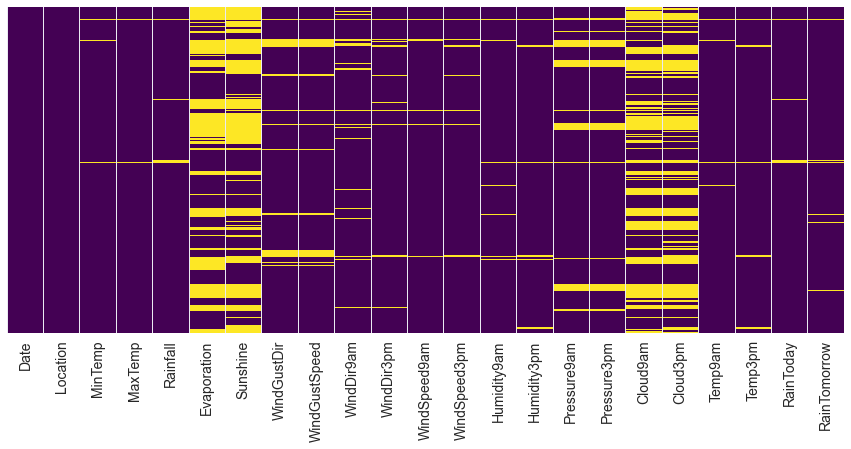

In [14]:
plt.figure(figsize=(15, 6)) 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

**Few conclusion:**
    
* There are more missing values in this Evaporation, WindGustDir, Cloud9am and Cloud3am columns.
* Soo we need to handle them.
* We can handle them with the help of mean and mode.

In [15]:
Missing_data = pd.DataFrame({'Missing count': df.isnull().sum(), 'Missing Percentage': (df.isnull().sum()/df.shape[0])*100})
Missing_data

,Missing count,Missing Percentage
Date,0,0.000000
Location,0,0.000000
MinTemp,1485,1.020899
MaxTemp,1261,0.866905
Rainfall,3261,2.241853
Evaporation,62790,43.166506
Sunshine,69835,48.009762
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
WindDir9am,10566,7.263853


In [16]:
df.fillna(df.mean(), inplace=True)

In [17]:
df.fillna({"WindGustDir": df['WindGustDir'].mode()[0], 
               "WindDir9am": df['WindDir9am'].mode()[0],
               "WindDir3pm": df['WindDir3pm'].mode()[0],
               "RainToday": df['RainToday'].mode()[0],
               "RainTomorrow": df['RainTomorrow'].mode()[0]}, inplace=True)

In [18]:
Missing_data = pd.DataFrame({'Missing count': df.isnull().sum(), 'Missing Percentage': (df.isnull().sum()/df.shape[0])*100})
Missing_data

,Missing count,Missing Percentage
Date,0,0.0
Location,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
Evaporation,0,0.0
Sunshine,0,0.0
WindGustDir,0,0.0
WindGustSpeed,0,0.0
WindDir9am,0,0.0


## Changing the data types of the column

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [20]:
idx = pd.DatetimeIndex(df['Date'])
df['Date'] = idx
df['MinTemp'] = df['MinTemp'].astype(np.float32)
df['MaxTemp'] = df['MaxTemp'].astype(np.float32)
df['Rainfall'] = df['Rainfall'].astype(np.float32)
df['Evaporation'] = df['Evaporation'].astype(np.float32)
df['Sunshine'] = df['Sunshine'].astype(np.float32)
df['WindGustSpeed'] = df['WindGustSpeed'].astype(np.float32)
df['WindSpeed9am'] = df['WindSpeed9am'].astype(np.float32)
df['WindSpeed3pm'] = df['WindSpeed3pm'].astype(np.float32)
df['Humidity9am'] = df['Humidity9am'].astype(np.float32)
df['Humidity3pm'] = df['Humidity3pm'].astype(np.float32)
df['Pressure9am'] = df['Pressure9am'].astype(np.float32)
df['Pressure3pm'] = df['Pressure3pm'].astype(np.float32)
df['Cloud9am'] = df['Cloud9am'].astype(np.float32)
df['Cloud3pm'] = df['Cloud3pm'].astype(np.float32)
df['Temp9am'] = df['Temp9am'].astype(np.float32)
df['Temp3pm'] = df['Temp3pm'].astype(np.float32)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float32       
 3   MaxTemp        145460 non-null  float32       
 4   Rainfall       145460 non-null  float32       
 5   Evaporation    145460 non-null  float32       
 6   Sunshine       145460 non-null  float32       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float32       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float32       
 12  WindSpeed3pm   145460 non-null  float32       
 13  Humidity9am    145460 non-null  float32       
 14  Humidity3pm    145460 non-null  float32       
 15  

## Numerical and Categorical Columns in the data set

In [22]:
datatype = df.dtypes
numerical_columns = datatype[datatype == 'float32'].index.tolist()
categorical_columns = datatype[datatype == 'object'].index.tolist()

In [23]:
print("The Numerical Columns:", numerical_columns)

The Numerical Columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [24]:
print("The Categorical Columns:", categorical_columns)

The Categorical Columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [25]:
df[categorical_columns].nunique()

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [26]:
df['RainToday'] = df['RainToday'].apply(lambda x: 1 if x == 'Yes'
                                       else 0 )
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 1 if x == 'Yes'
                                        else 0)

# Total count of different cities and their data points

![](https://imageresizer.static9.net.au/1qGKu9VjuwkDh8brzLxC8hZ6mc4=/1000x0/https%3A%2F%2Fprod.static9.net.au%2Ffs%2F9d49e6ea-c731-4acb-aa7f-e0fd18009b10)

In [27]:
df['Location'].value_counts()

Canberra            3436
Sydney              3344
Adelaide            3193
Brisbane            3193
Perth               3193
Melbourne           3193
Darwin              3193
Hobart              3193
Wollongong          3040
GoldCoast           3040
Bendigo             3040
Cairns              3040
Albany              3040
Ballarat            3040
MountGinini         3040
Townsville          3040
Launceston          3040
MountGambier        3040
AliceSprings        3040
Albury              3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
MelbourneAirport    3009
Nuriootpa           3009
Watsonia            3009
Sale                3009
Moree               3009
CoffsHarbour        3009
BadgerysCreek       3009
PerthAirport        3009
SydneyAirport       3009
Woomera             3009
Cobar               3009
Williamtown         3009
Richmond            3009
NorfolkIsland       3009
Dartmoor            3009
WaggaWagga          3009
Portland            3009


In [28]:
print("Soo we have a total {} number of city data points".format(len(df['Location'].unique())))

Soo we have a total 49 number of city data points


In [29]:
df['WindGustDir'].value_counts()

W      20241
SE      9418
N       9313
SSE     9216
E       9181
S       9168
WSW     9069
SW      8967
SSW     8736
WNW     8252
NW      8122
ENE     8104
ESE     7372
NE      7133
NNW     6620
NNE     6548
Name: WindGustDir, dtype: int64

In [30]:
df['RainToday'].unique()

array([0, 1], dtype=int64)

In [31]:
df['RainTomorrow'].unique()

array([0, 1], dtype=int64)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float32       
 3   MaxTemp        145460 non-null  float32       
 4   Rainfall       145460 non-null  float32       
 5   Evaporation    145460 non-null  float32       
 6   Sunshine       145460 non-null  float32       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float32       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float32       
 12  WindSpeed3pm   145460 non-null  float32       
 13  Humidity9am    145460 non-null  float32       
 14  Humidity3pm    145460 non-null  float32       
 15  

## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:

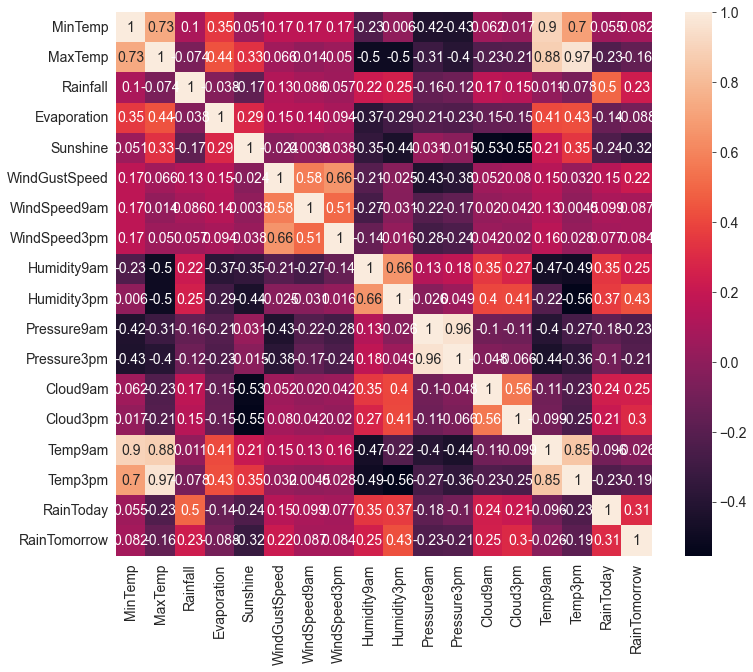

In [33]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show();

**Few Conclusions**

* The Positively correlated columns with output are:
    1. Rainfall.
    2. WindGustSpeed.
    3. Humidity9am.
    4. Humidity3pm.
    5. Cloud9am.
    6. Cloud3pm.
    7. RainToday
* The Negatively correlated columns with output are:
    8. Sunshine.
    9. Pressure9am.
    10. Pressure3pm.

## This following are the important columns we analyse them. 

In [34]:
Important_columns = ['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
                    'Sunshine', 'Pressure9am', 'Pressure3pm']

## Univariate Analysis

1. We explore variables one by one.
2. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.

**Continuous Variable Analysis**

 - Measure of central tendency(Mean, Median, Mode) of the variable.
 - Measure of spread(Range,IQR, Variance,Standard Deviation) of the variable.
 - Measure of Shape(Symmetrical Distribution e.g. Normal Distribution,Asymmetrical Distribution (Left or Right Skewed Distribution),Kurtosis(shape of the of the distribution in terms of height or flatness)

**Categorical Variable Analysis**

 - For categorical variables, we will use frequency distribution of each category.e.g Bar Chart, Pie Chart

In [35]:
rain_df = df[df['RainTomorrow'] == 1]
no_rain_df = df[df['RainTomorrow'] == 0]

## Analysing the Humidity column

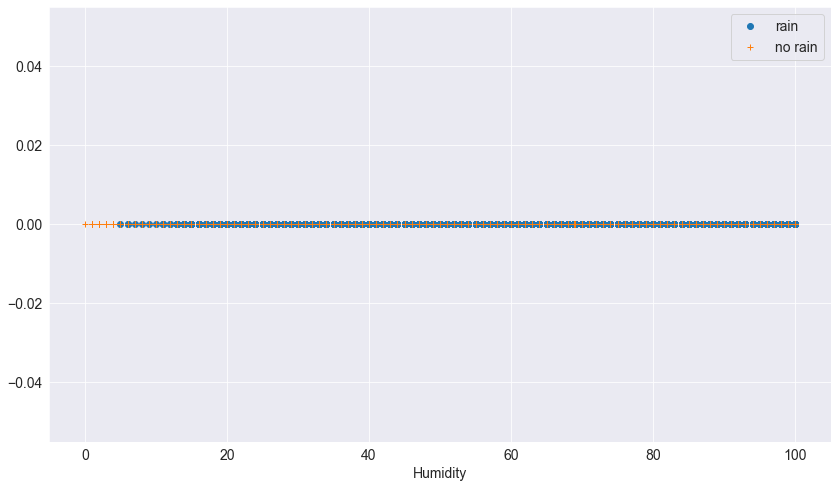

In [36]:
plt.figure(figsize=(14, 8))
plt.plot(rain_df['Humidity9am'], np.zeros_like(rain_df['Humidity9am']), 'o', label='rain')
plt.plot(no_rain_df['Humidity9am'], np.zeros_like(no_rain_df['Humidity9am']), '+', label='no rain')
plt.xlabel("Humidity")
plt.legend();

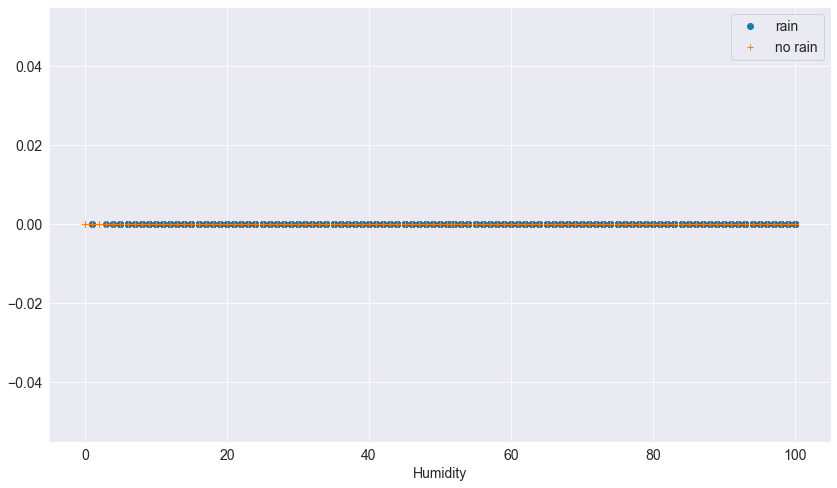

In [37]:
plt.figure(figsize=(14, 8))
plt.plot(rain_df['Humidity3pm'], np.zeros_like(rain_df['Humidity3pm']), 'o', label='rain')
plt.plot(no_rain_df['Humidity3pm'], np.zeros_like(no_rain_df['Humidity3pm']), '+', label='no rain')
plt.xlabel("Humidity")
plt.legend();

**Few Conclusion**
* The Humidity column value is lie in the range of 0 to 100.
* If on that day the rain is falling the humidity value is greater than 5.
* and on the no rain day the humidity value is generally start from 0.

## Analysing the Cloud column

In [38]:
df['Cloud9am'].unique()

array([8.      , 4.447461, 7.      , 1.      , 0.      , 5.      ,
       4.      , 2.      , 6.      , 3.      , 9.      ], dtype=float32)

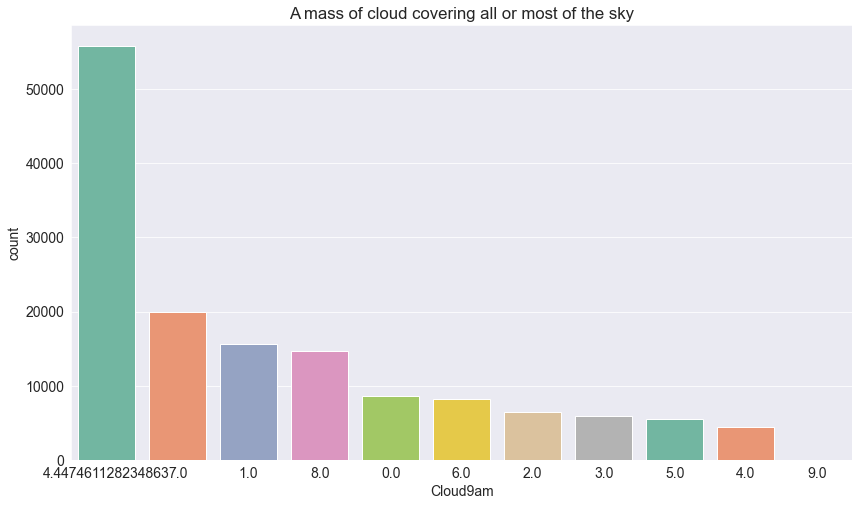

In [39]:
plt.figure(figsize=(14, 8))
plt.xlabel("Cloud9am")
plt.ylabel("Count")
plt.title("A mass of cloud covering all or most of the sky")
ax = sns.countplot(x=df['Cloud9am'],
                   order=df['Cloud9am'].value_counts(ascending=False).index, palette = "Set2");

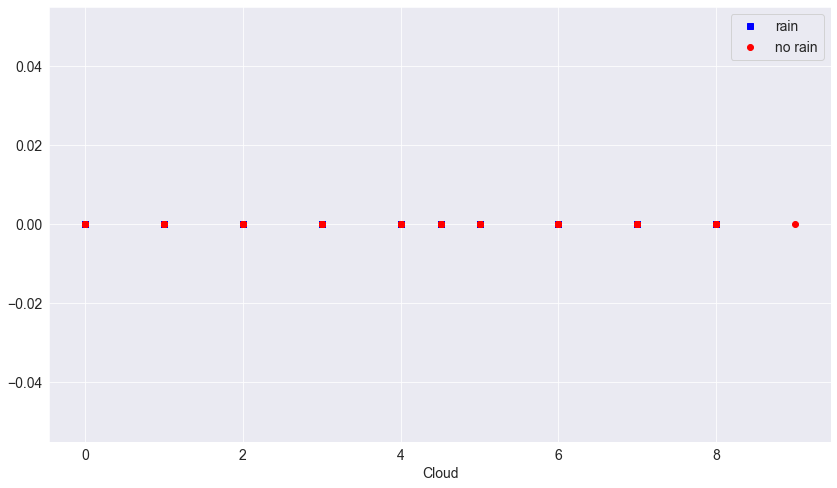

In [40]:
plt.figure(figsize=(14, 8))
plt.plot(rain_df['Cloud3pm'], np.zeros_like(rain_df['Cloud3pm']), 'sb', label='rain')
plt.plot(no_rain_df['Cloud3pm'], np.zeros_like(no_rain_df['Cloud3pm']), 'or', label='no rain')
plt.xlabel("Cloud")
plt.legend();

## Analysing the Pressure column

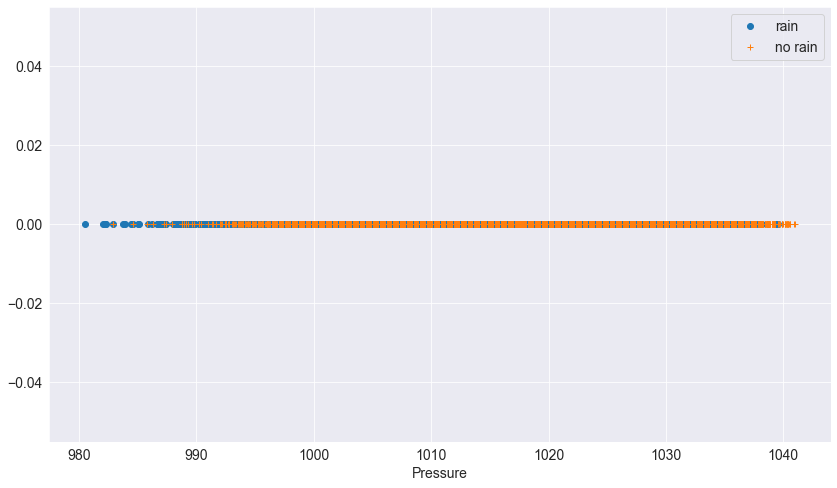

In [41]:
plt.figure(figsize=(14, 8))
plt.plot(rain_df['Pressure9am'], np.zeros_like(rain_df['Pressure9am']), 'o', label='rain')
plt.plot(no_rain_df['Pressure9am'], np.zeros_like(no_rain_df['Pressure9am']), '+', label='no rain')
plt.xlabel("Pressure")
plt.legend();

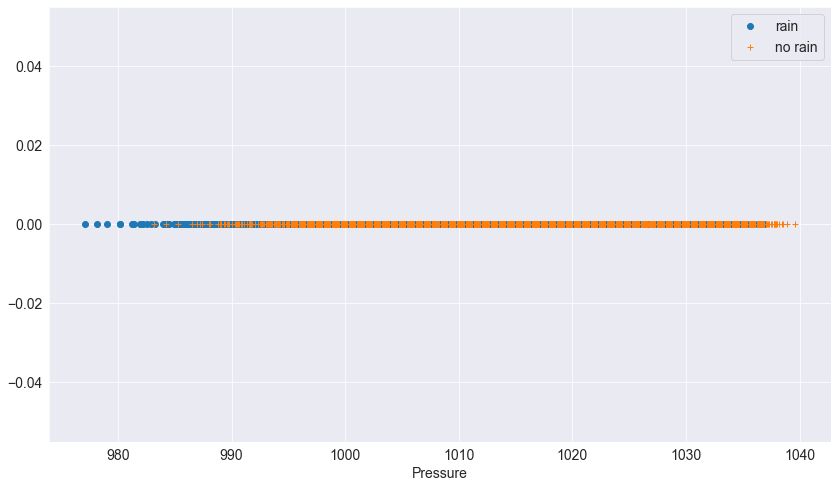

In [42]:
plt.figure(figsize=(14, 8))
plt.plot(rain_df['Pressure3pm'], np.zeros_like(rain_df['Pressure3pm']), 'o', label='rain')
plt.plot(no_rain_df['Pressure3pm'], np.zeros_like(no_rain_df['Pressure3pm']), '+', label='no rain')
plt.xlabel("Pressure")
plt.legend();

**Few Conclusion**
* In some days the pressure is low on that days the rain is falling.
* above the 990 pressure the rain is not falling.

## Analysing the Rainfall column

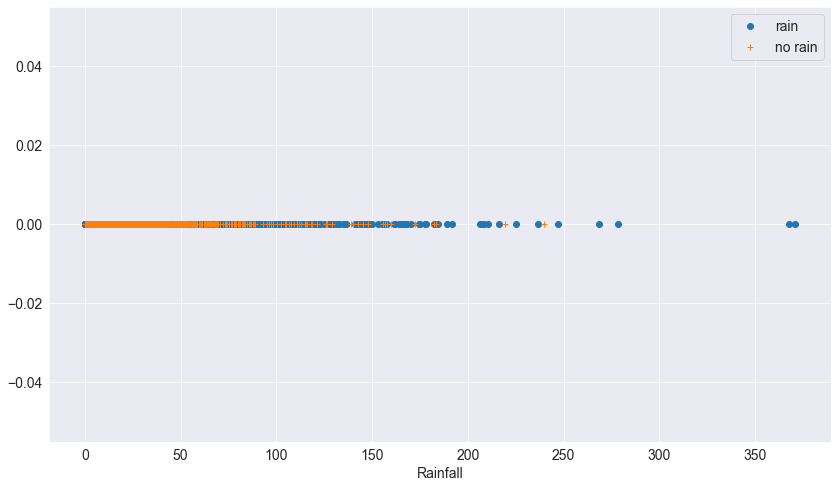

In [43]:
plt.figure(figsize=(14, 8))
plt.plot(rain_df['Rainfall'], np.zeros_like(rain_df['Rainfall']), 'o', label='rain')
plt.plot(no_rain_df['Rainfall'], np.zeros_like(no_rain_df['Rainfall']), '+', label='no rain')
plt.xlabel("Rainfall")
plt.legend();

## Analysing the WindGustSpeed column

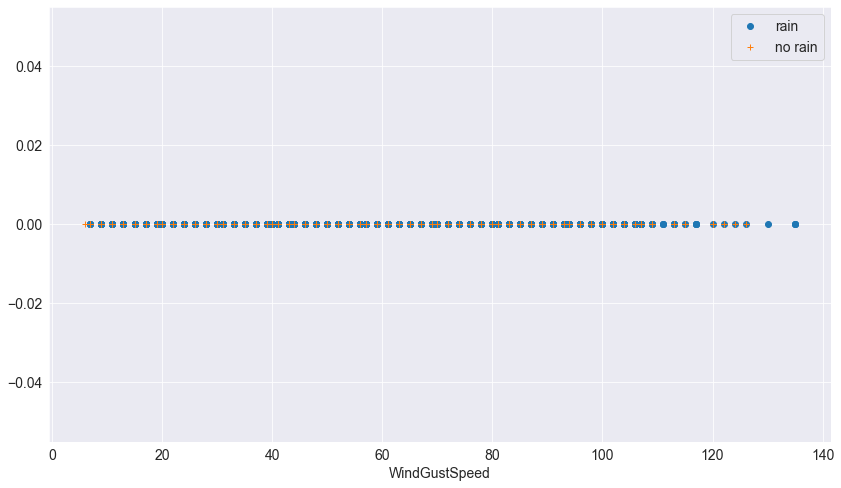

In [44]:
plt.figure(figsize=(14, 8))
plt.plot(rain_df['WindGustSpeed'], np.zeros_like(rain_df['WindGustSpeed']), 'o', label='rain')
plt.plot(no_rain_df['WindGustSpeed'], np.zeros_like(no_rain_df['WindGustSpeed']), '+', label='no rain')
plt.xlabel("WindGustSpeed")
plt.legend();

## Analysing the RainToday column

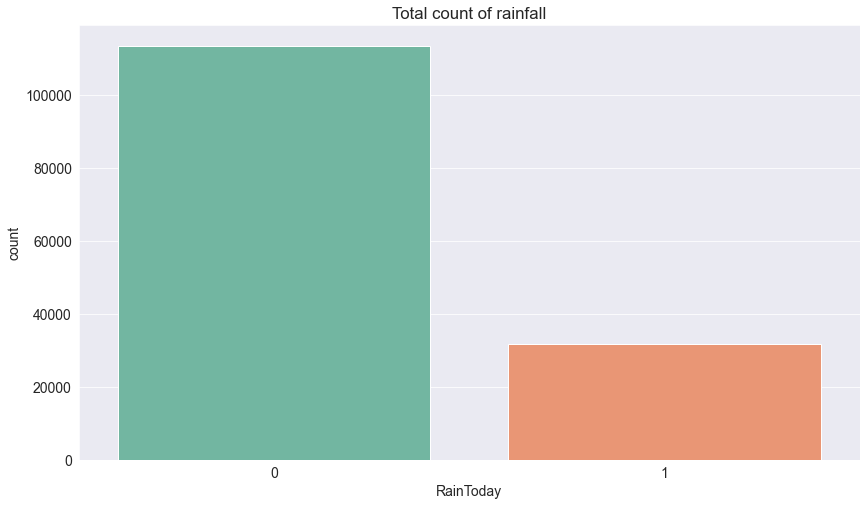

In [45]:
plt.figure(figsize=(14, 8))
plt.xlabel("Rain fall count")
plt.ylabel("Count")
plt.title("Total count of rainfall")
sns.countplot(x ='RainToday', data = df, palette = "Set2");

In [46]:
# plt.axis("equal")
# plt.pie('RainToday', data=df)
# plt.show();

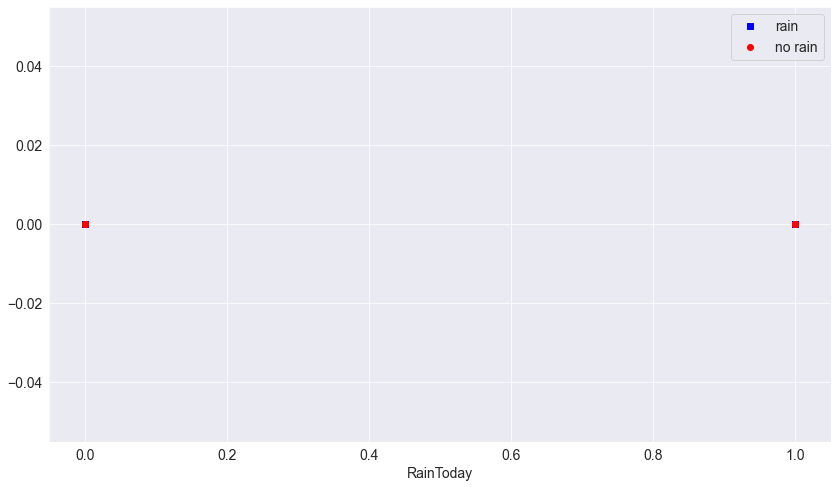

In [47]:
plt.figure(figsize=(14, 8))
plt.plot(rain_df['RainToday'], np.zeros_like(rain_df['RainToday']), 'sb', label='rain')
plt.plot(no_rain_df['RainToday'], np.zeros_like(no_rain_df['RainToday']), 'or', label='no rain')
plt.xlabel("RainToday")
plt.legend();

## Analysing the Sunshine column

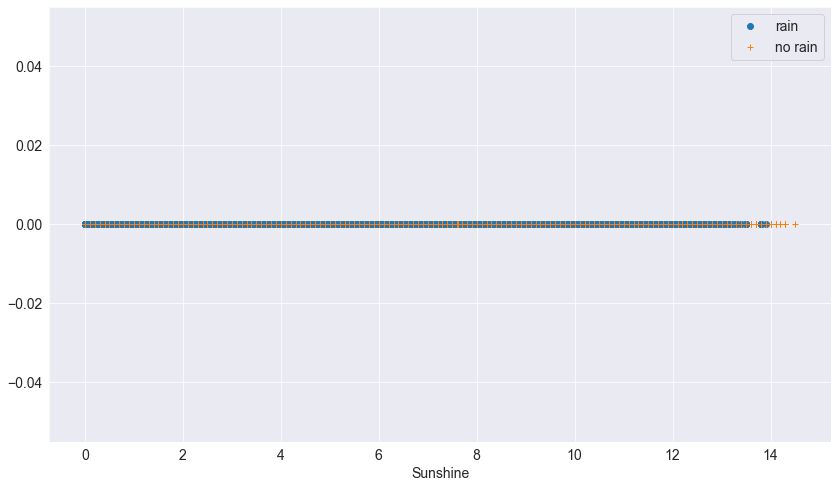

In [48]:
plt.figure(figsize=(14, 8))
plt.plot(rain_df['Sunshine'], np.zeros_like(rain_df['Sunshine']), 'o', label='rain')
plt.plot(no_rain_df['Sunshine'], np.zeros_like(no_rain_df['Sunshine']), '+', label='no rain')
plt.xlabel("Sunshine")
plt.legend();

# Histogram plot

In [49]:
def Histogram(column):
    plt.figure(figsize=(14, 8))
    plt.xlabel("Distrubution")
    plt.ylabel("Count")
    plt.title("The Histogram of {}".format(column))
    plt.hist(df[column], rwidth=0.95, bins=10)
    plt.show();


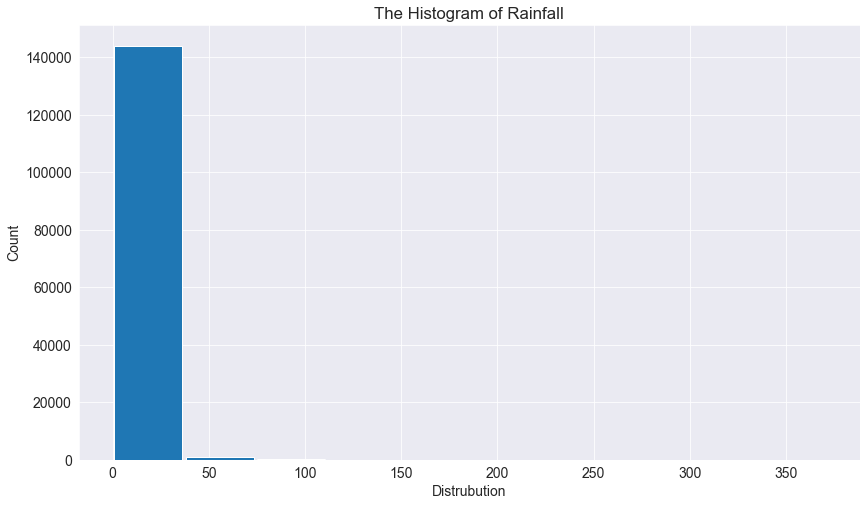

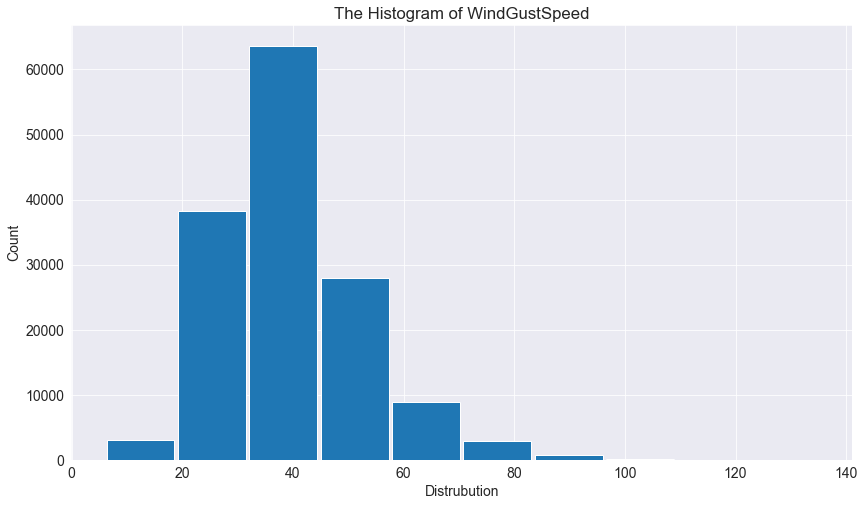

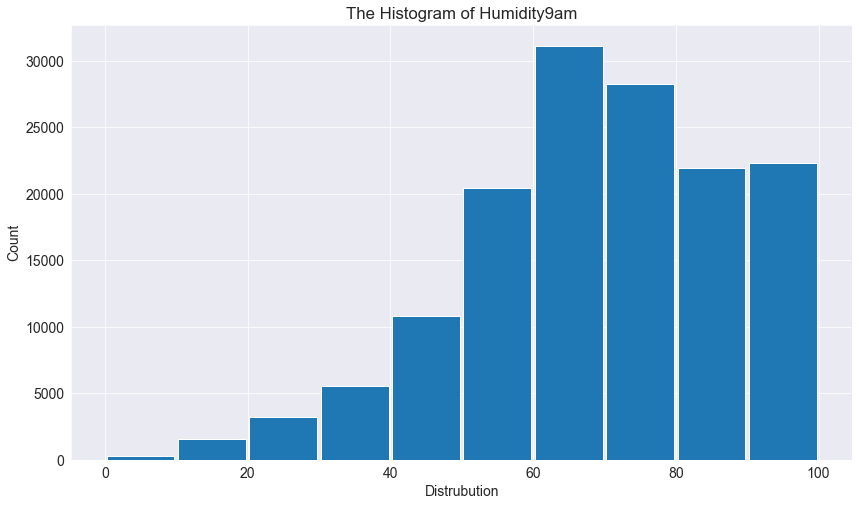

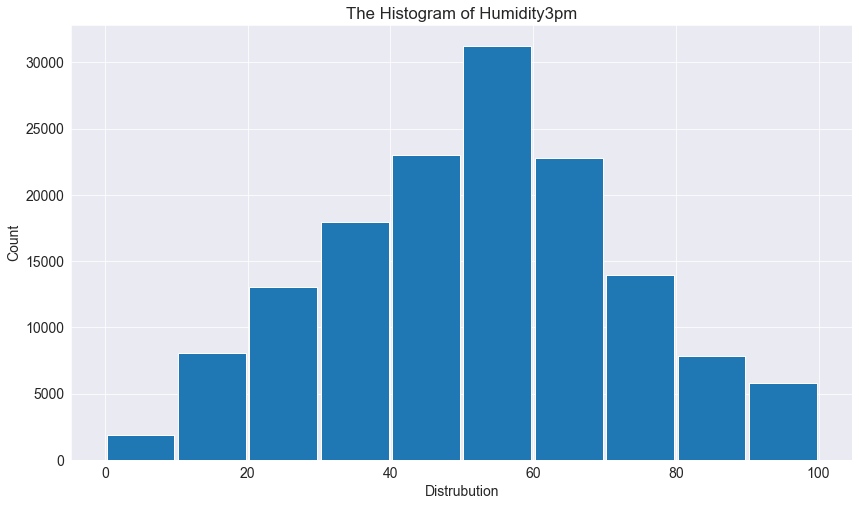

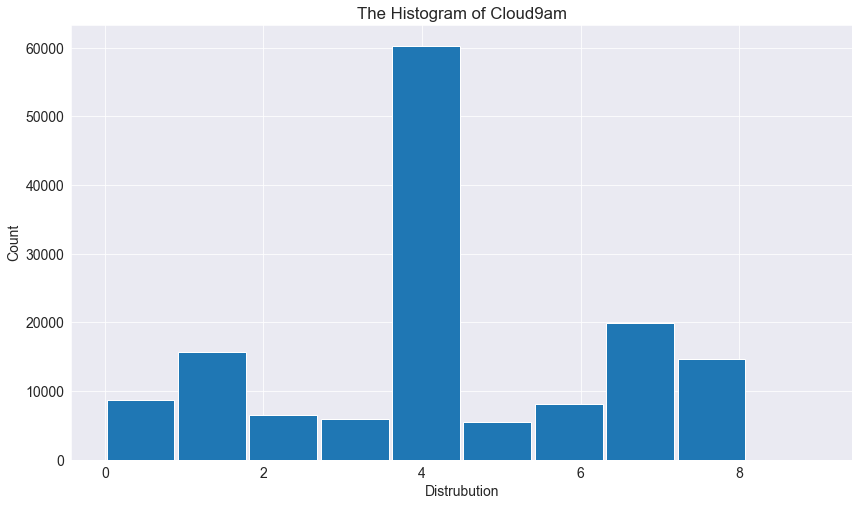

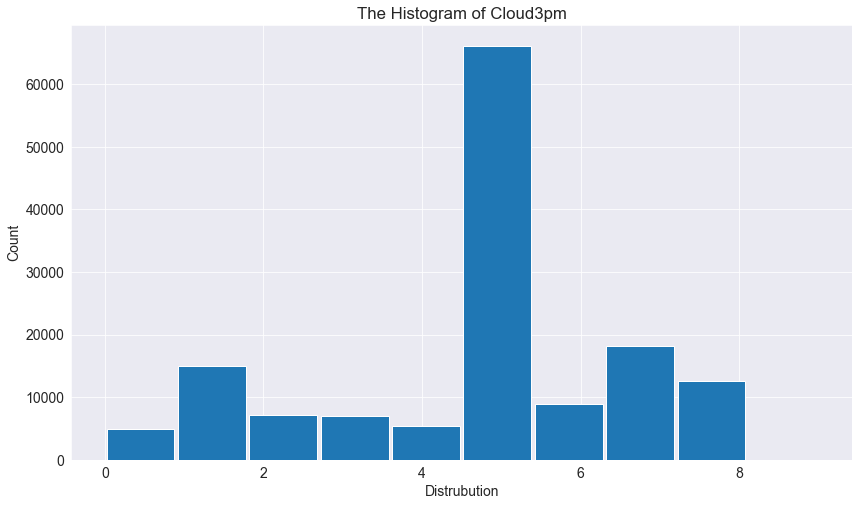

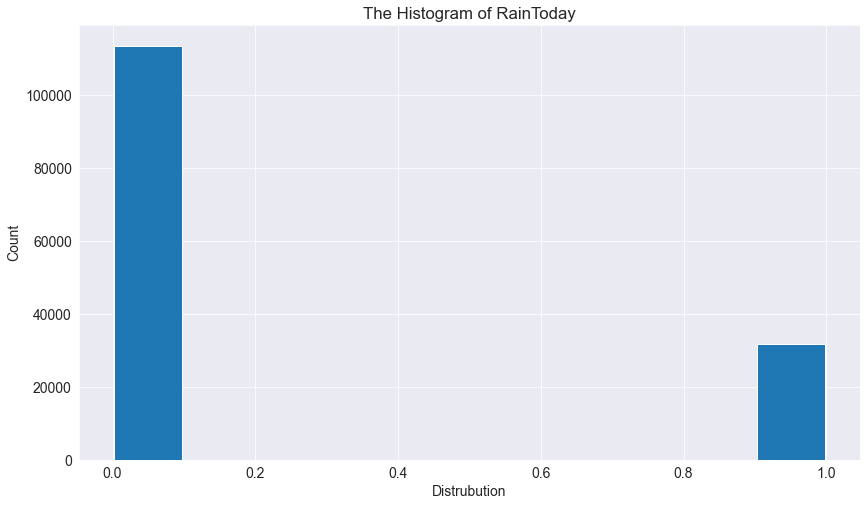

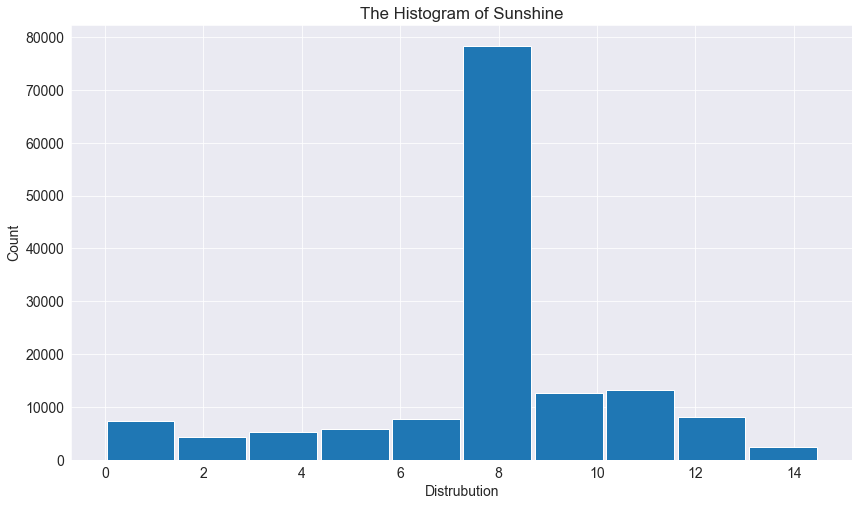

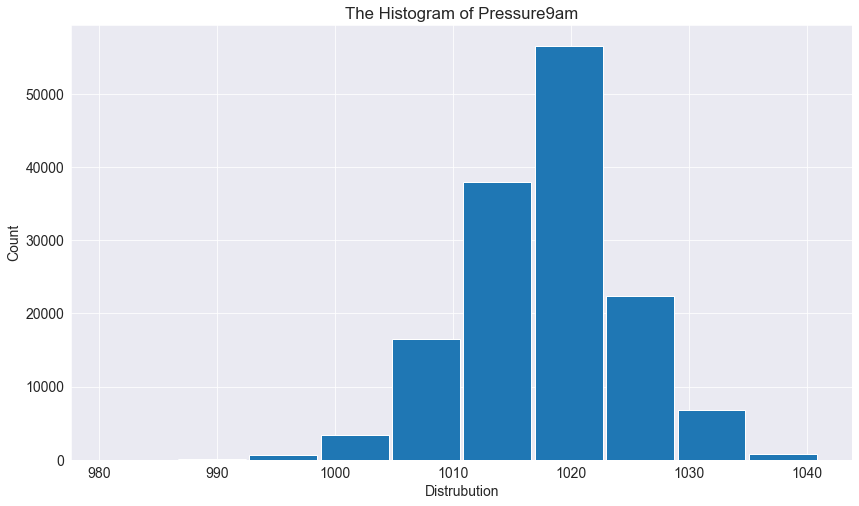

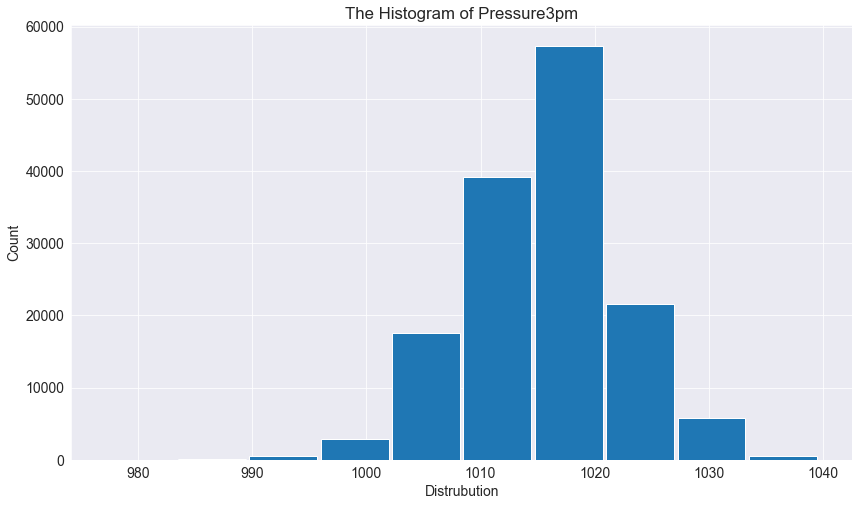

In [50]:
for column in Important_columns:
    Histogram(column)

# Distrubution plot

In [51]:
def DistrubutionPlot(column):
    plt.figure(figsize=(14, 8))
    plt.xlabel("Distrubution")
    plt.ylabel("Probability")
    plt.title("The Histogram of {}".format(column))
    sns.distplot(df[column])
    plt.show();

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


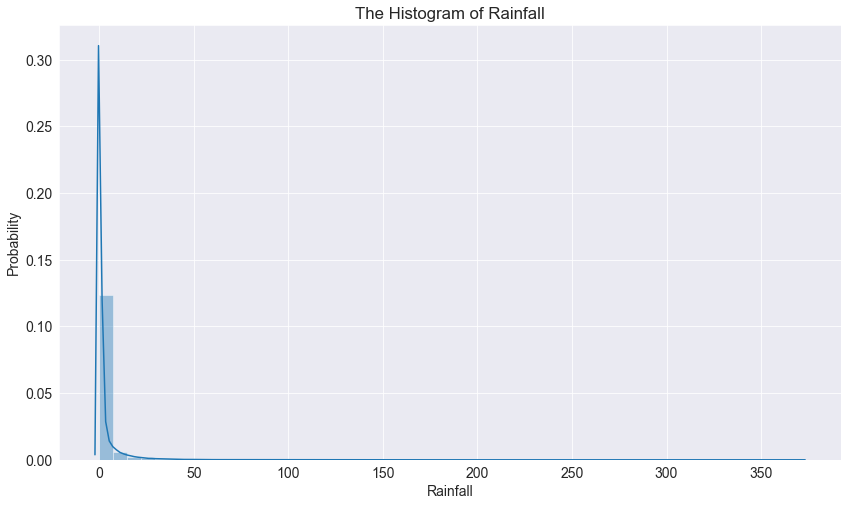

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


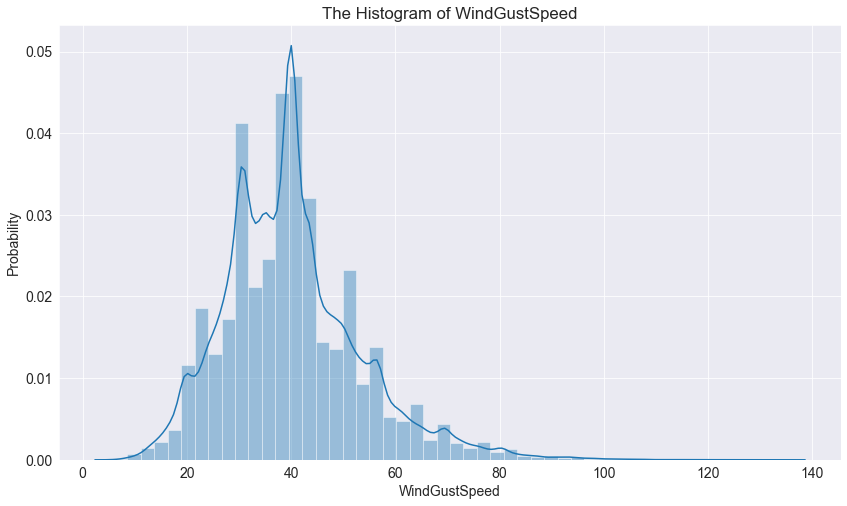

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


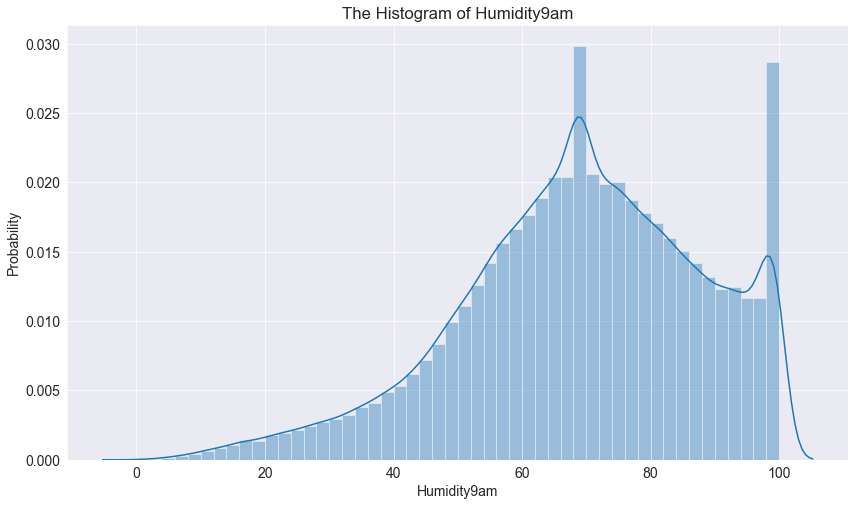

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


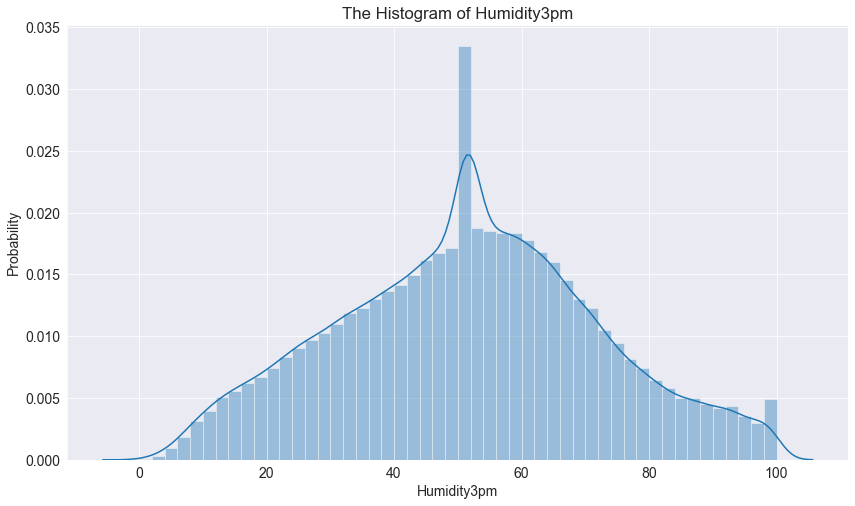

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


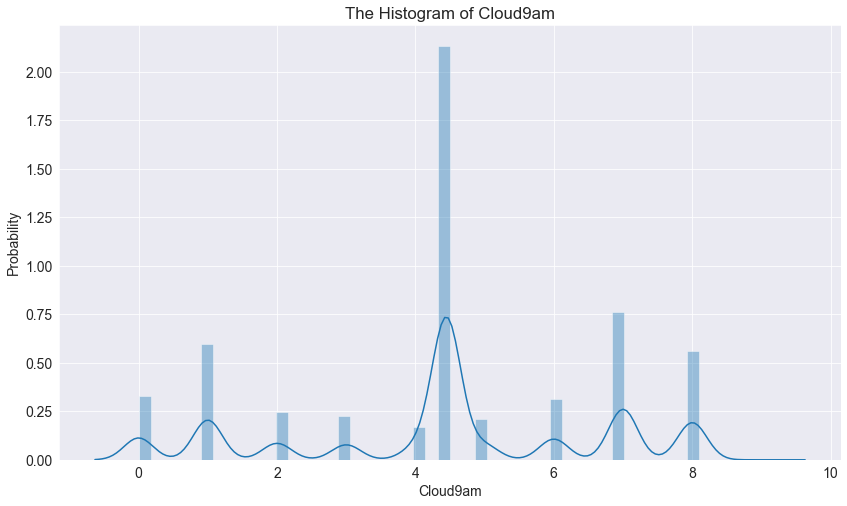

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


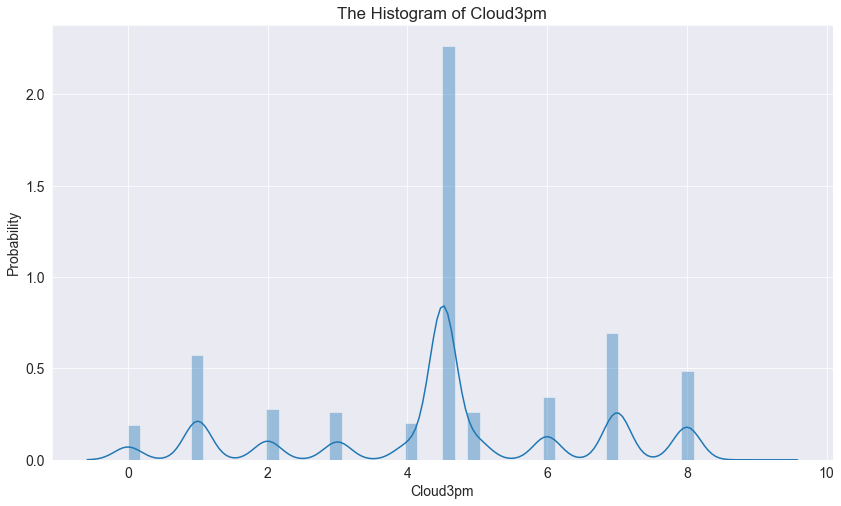

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


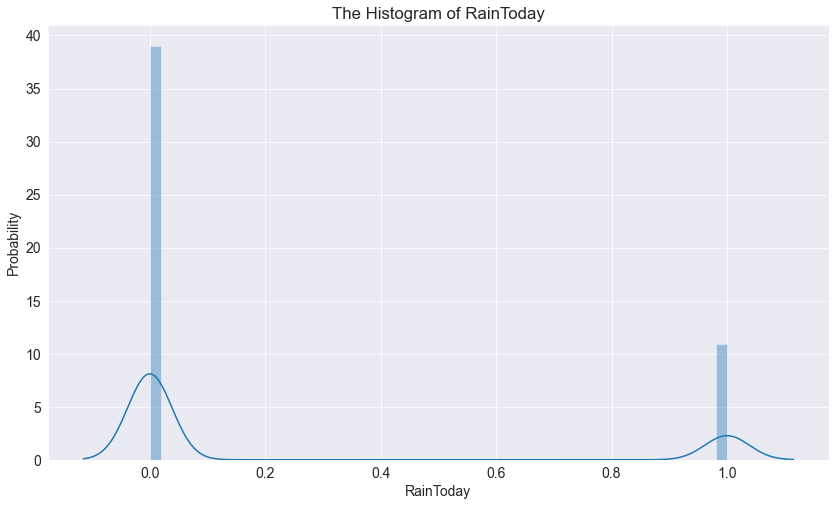

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


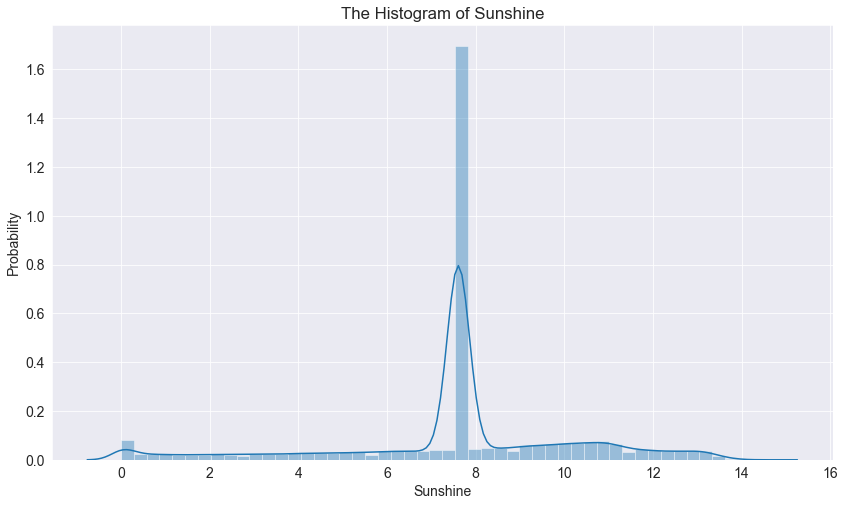

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


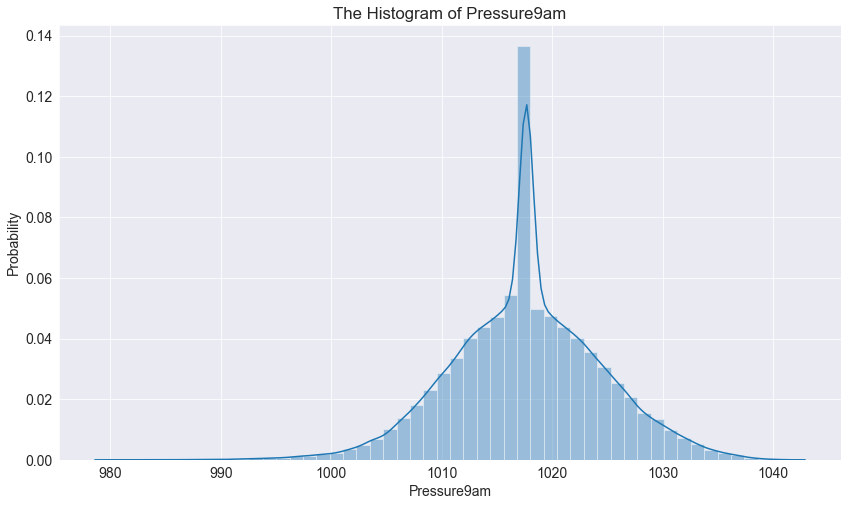

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


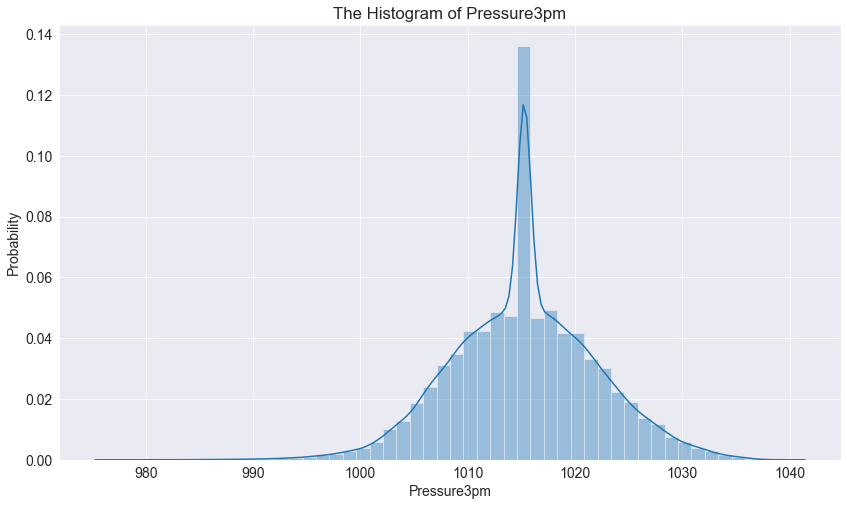

In [52]:
for column in Important_columns:
    DistrubutionPlot(column)

# Box plot

In [53]:
def Boxplot(column):
    plt.figure(figsize=(16, 5))
    plt.title("The Box plot of {}".format(column))
    sns.boxplot(df[column])
    plt.show();

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


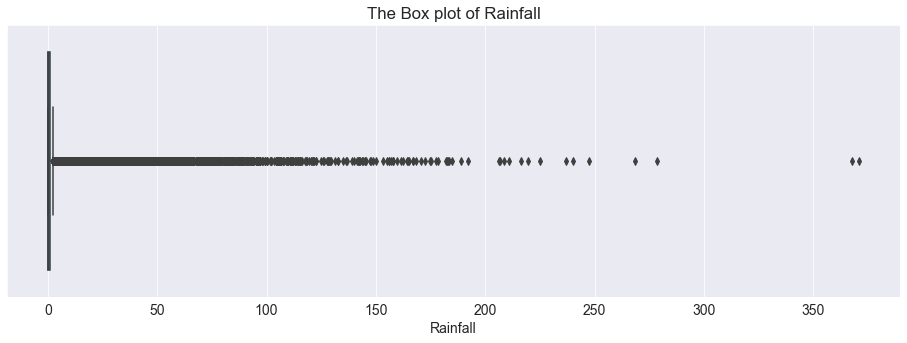

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


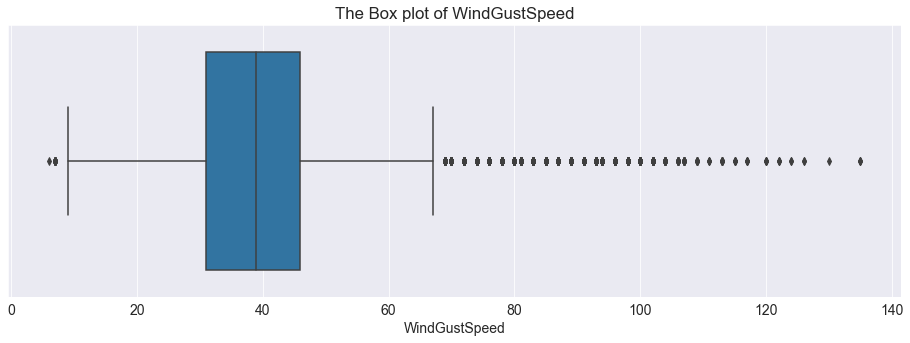

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


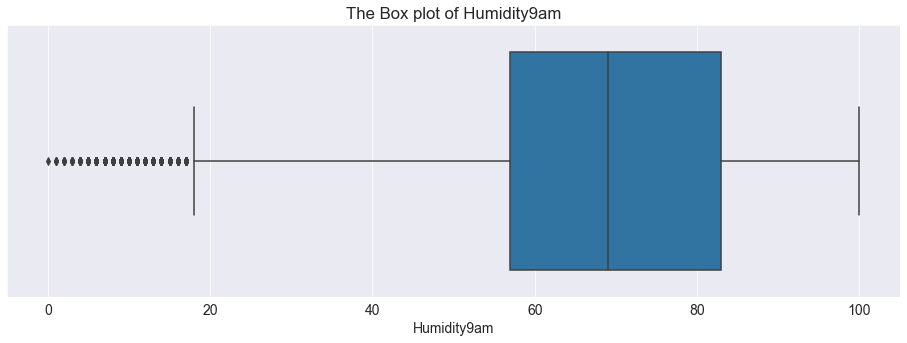

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


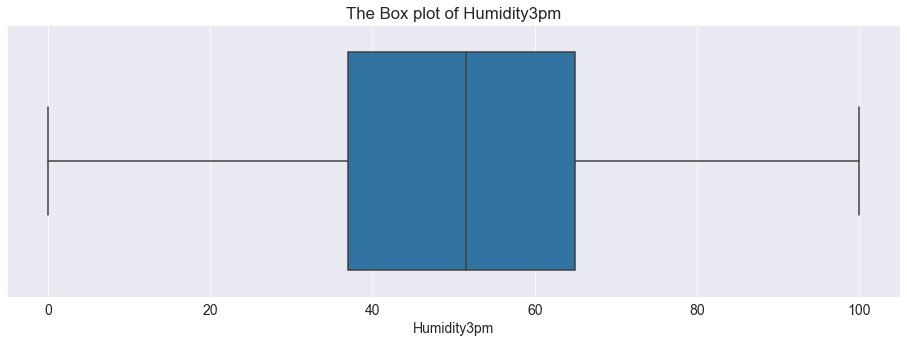

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


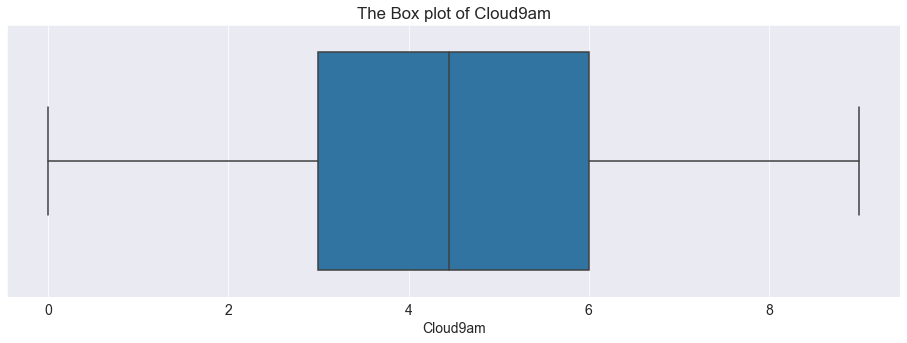

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


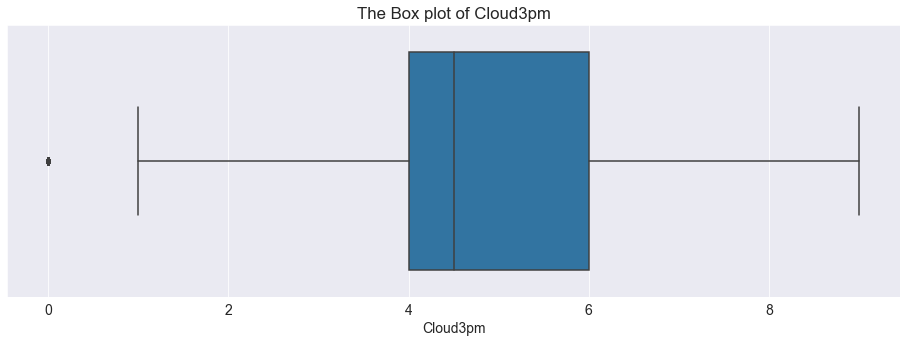

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


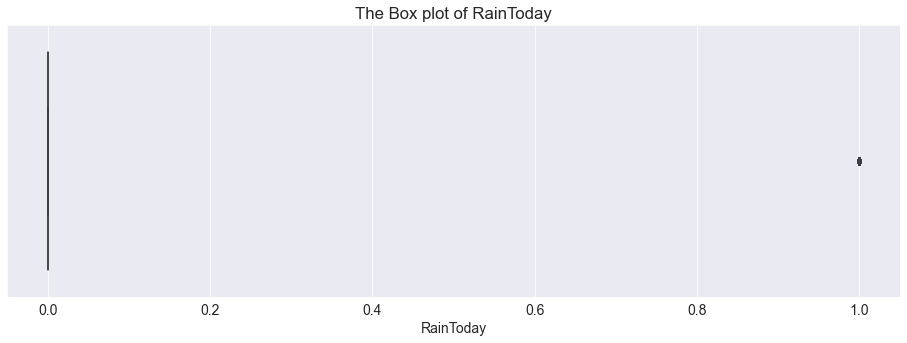

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


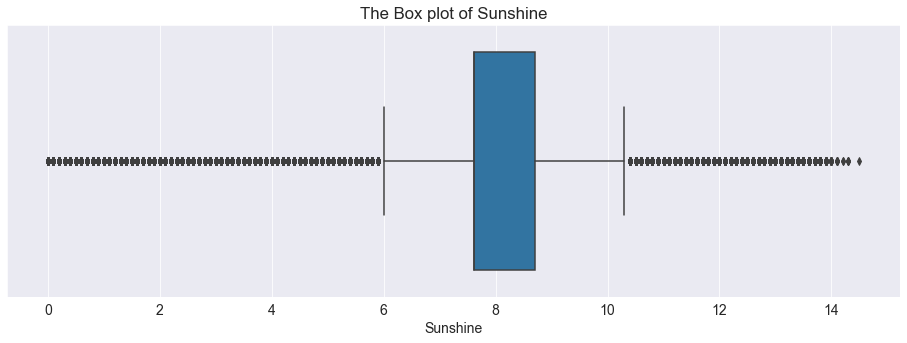

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


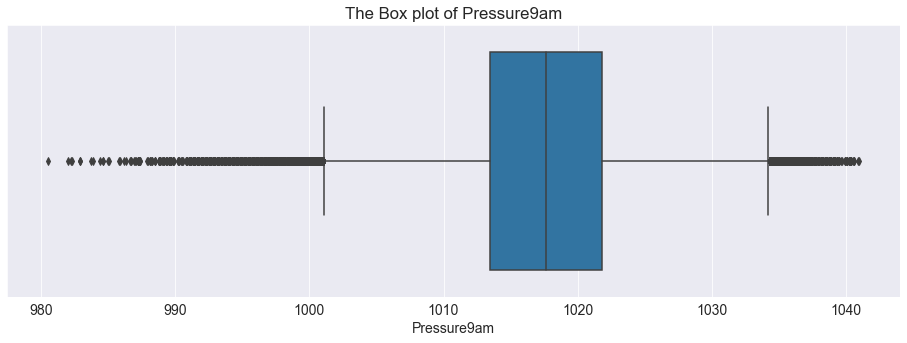

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


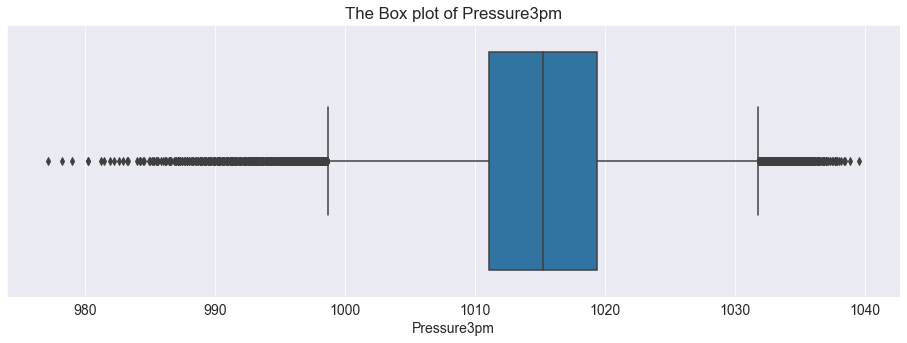

In [54]:
for column in Important_columns:
    Boxplot(column)

**Few Conclusion**
* In most of the columns the outliers are present and the distrubution of data is not normal.
* But in this problem we are not handling a outliers.

## Bivariate Analysis

1. We perform bi-variate analysis with 2 variables for any combination of categorical and continuous variables. 
3. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. 
4. Different methods are used to tackle these combinations during analysis process.

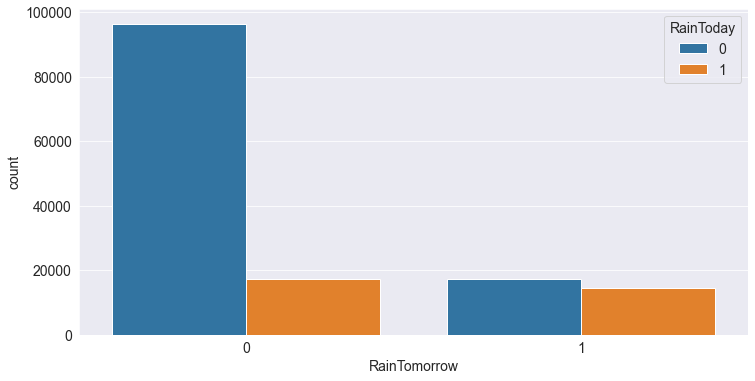

In [58]:
sns.countplot(x ='RainTomorrow', hue = "RainToday", data = df)
plt.show()

c:\users\abc\appdata\local\programs\python\python36\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


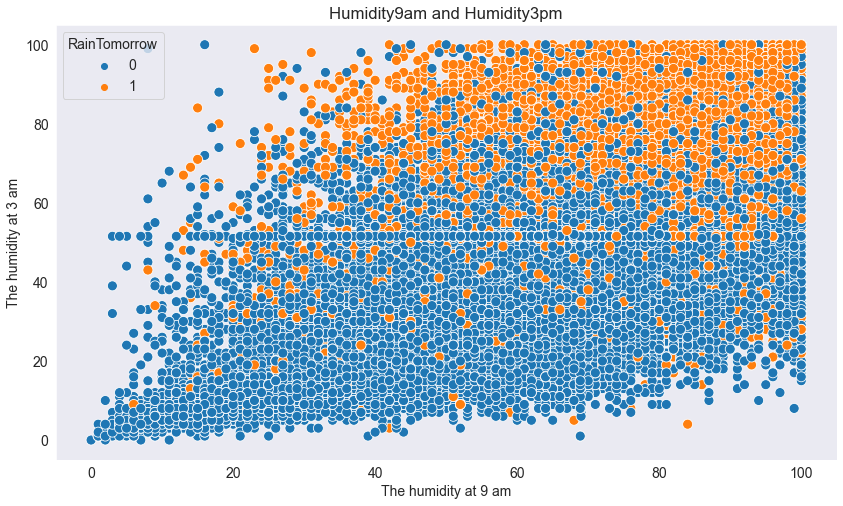

In [61]:
plt.figure(figsize=(14, 8))
plt.xlabel("The humidity at 9 am")
plt.ylabel("The humidity at 3 am")
plt.title("Humidity9am and Humidity3pm")
sns.scatterplot(x='Humidity9am', y='Humidity3pm', data=df, s=100, hue='RainTomorrow')
plt.grid();

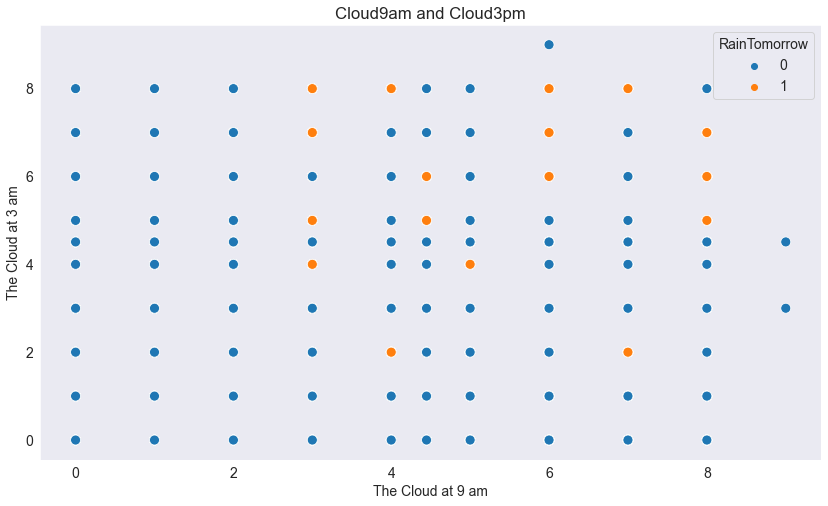

In [62]:
plt.figure(figsize=(14, 8))
plt.xlabel("The Cloud at 9 am")
plt.ylabel("The Cloud at 3 am")
plt.title("Cloud9am and Cloud3pm")
sns.scatterplot(x='Cloud9am', y='Cloud3pm', data=df, s=100, hue='RainTomorrow')
plt.grid();

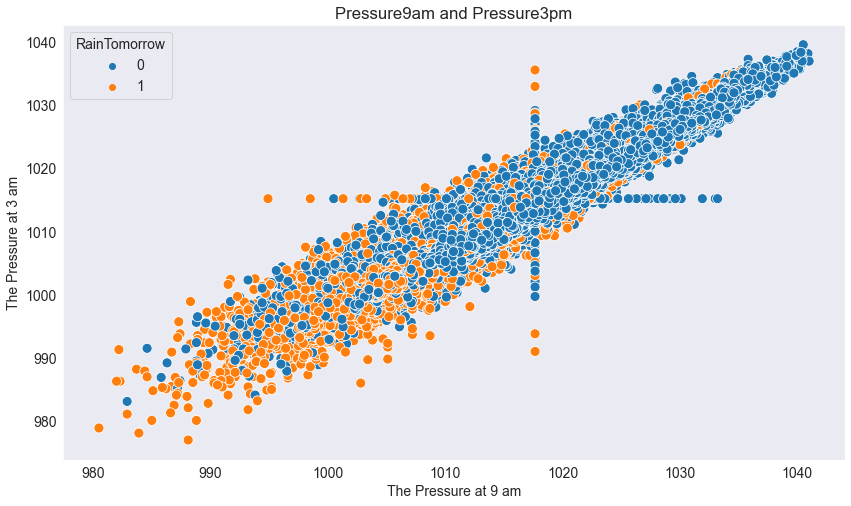

In [63]:
plt.figure(figsize=(14, 8))
plt.xlabel("The Pressure at 9 am")
plt.ylabel("The Pressure at 3 am")
plt.title("Pressure9am and Pressure3pm")
sns.scatterplot(x='Pressure9am', y='Pressure3pm', data=df, s=100, hue='RainTomorrow')
plt.grid();

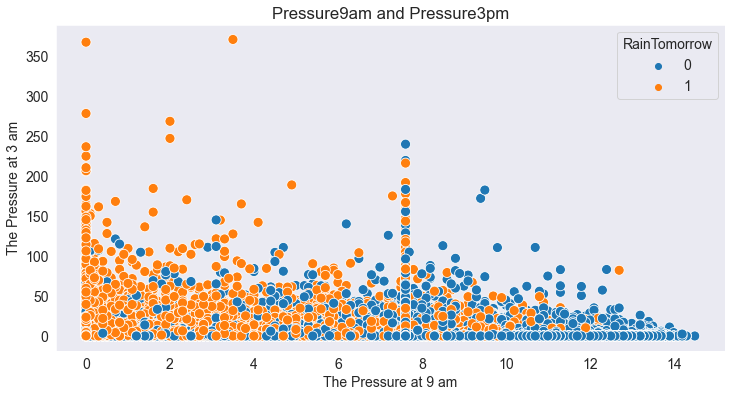

In [65]:
plt.xlabel("The Pressure at 9 am")
plt.ylabel("The Pressure at 3 am")
plt.title("Pressure9am and Pressure3pm")
sns.scatterplot(x='Sunshine', y='Rainfall', data=df, s=100, hue='RainTomorrow')
plt.grid();

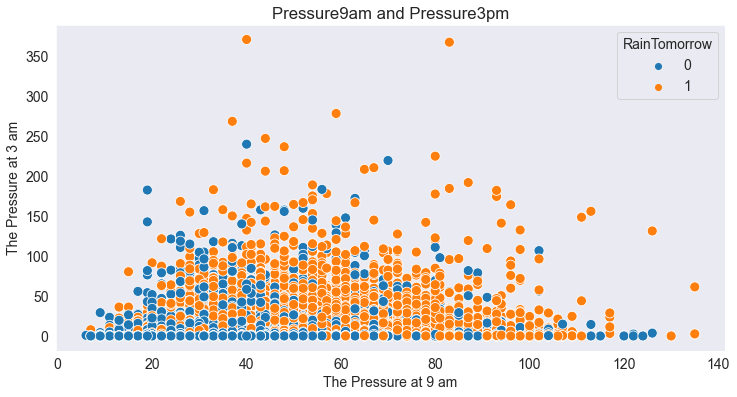

In [66]:
plt.xlabel("The Pressure at 9 am")
plt.ylabel("The Pressure at 3 am")
plt.title("Pressure9am and Pressure3pm")
sns.scatterplot(x='WindGustSpeed', y='Rainfall', data=df, s=100, hue='RainTomorrow')
plt.grid();

In [56]:
Important_columns

['Rainfall',
 'WindGustSpeed',
 'Humidity9am',
 'Humidity3pm',
 'Cloud9am',
 'Cloud3pm',
 'RainToday',
 'Sunshine',
 'Pressure9am',
 'Pressure3pm']